# Lab 4 The application of TaLib again 
- 着重介绍TA-Lib中强大的数学运算、数学变换、统计函数、价格变换、周期指标和波动率指标函数及其应用实例。
- 按照tips: 在cmd上使用“pip install talib”命令一般会报错，正确安装方法是，进入https://www.lfd.uci.edu/~gohlke/pythonlibs/，下拉选择TA_Lib-0.4.17-cp37-cp37m-win_amd64.whl（win系统64位，python3.7版本，根据自己系统和python版本选择相应的安装包），将下载包放在当前工作路径中，然后在Anaconda Prompt（或windows的cmd）里面输入命令：pip install TA_Lib-0.4.17-cp27-cp27m-win_amd64.whl。


In [2]:
#先引入后面可能用到的包（package）

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   

#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

#引入TA-Lib库
import talib as ta

#获取交易数据用于示例分析
import tushare as ts
def get_data(code,start='2015-01-01'):
    df=ts.get_k_data(code,start)
    df.index=pd.to_datetime(df.date)
    df=df.sort_index()
    return df

#获取上证指数收盘价、最高、最低价格
df=get_data('sh')[['open','close','high','low']]
df.head()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,close,high,low
date,,,,
2015-01-05,3258.63,3350.52,3369.28,3253.88
2015-01-06,3330.80,3351.45,3394.22,3303.18
2015-01-07,3326.65,3373.95,3374.90,3312.21
2015-01-08,3371.96,3293.46,3381.57,3285.09
2015-01-09,3276.97,3285.41,3404.83,3267.51


In [4]:
import cufflinks as cf
pipi=cf.QuantFig(df)
pipi.add_bollinger_bands()
pipi.iplot()

----
#### Step 1： 价格转换
- TA-Lib模块中提供的价格转换函数有四个，主要用于计算开盘价、收盘价、最高价、最低价之间的均值，具体如下表所示。
  - ![](https://pic4.zhimg.com/80/v2-6a890f81cbf5b7cbc7c9ec746493472b_720w.webp)

In [6]:
df['average']=ta.AVGPRICE(df.open,df.high,df.low,df.close)
df['median']=ta.MEDPRICE(df.high,df.low)
df['typical']=ta.TYPPRICE(df.high,df.low,df.close)
df['weight']=ta.WCLPRICE(df.high,df.low,df.close)
df.head()

,open,close,high,low,average,median,typical,weight
date,,,,,,,,
2015-01-05,3258.63,3350.52,3369.28,3253.88,3308.0775,3311.580,3324.560000,3331.0500
2015-01-06,3330.80,3351.45,3394.22,3303.18,3344.9125,3348.700,3349.616667,3350.0750
2015-01-07,3326.65,3373.95,3374.90,3312.21,3346.9275,3343.555,3353.686667,3358.7525
2015-01-08,3371.96,3293.46,3381.57,3285.09,3333.0200,3333.330,3320.040000,3313.3950
2015-01-09,3276.97,3285.41,3404.83,3267.51,3308.6800,3336.170,3319.250000,3310.7900


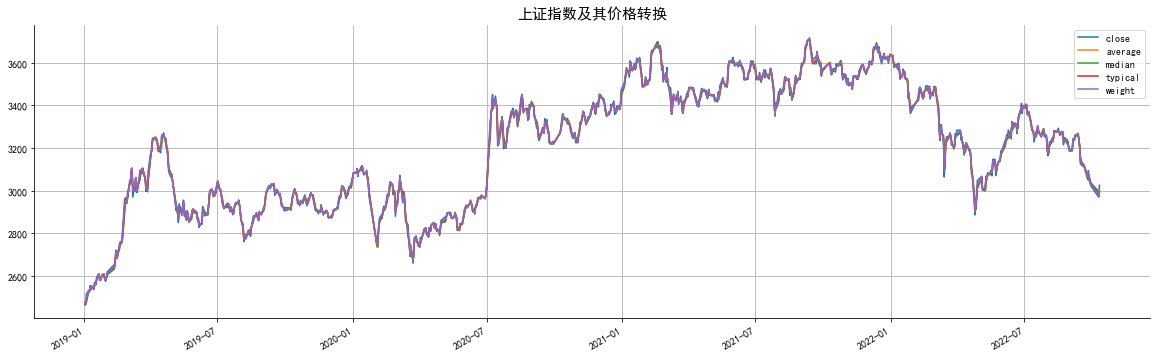

In [8]:
df.loc['2019-01-1':,['close','average','median','typical','weight']].plot(figsize=(20,6))
ax=plt.gca()
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数及其价格转换',fontsize=15)
plt.xlabel('')
plt.grid()
plt.show()


----
#### Step 2: 周期性指标函数Cycle Indicator Functions 
- 希尔伯特变换(Hilbert Transform)是积分变换中的一种，在信号处理领域得到了广泛的应用，而在工程中常用于窄带数字信号的处理。金融市场的波动是非周期、不规律的，但只要存在波动，就可以通过希尔伯特变换寻找其“周期性”。对于股价走势，一般可将其分解为：长期趋势、中短期周期性波动和噪声。在去除长期趋势的情况下，可以利用希尔伯特变换对中短期的周期性波动进行分析。关于希尔伯特变换原理及其在短线择时中的应用可参考广发证券金融工程专题报告《希尔伯特变换下的短线择时策略》
 - ![](https://pic2.zhimg.com/80/v2-c56e3364a568e2391489af27c0362165_720w.webp)

In [10]:
df=get_data('sh')[['open','close','high','low']]
df['dcperiod']=ta.HT_DCPERIOD(df.close)
df['dcphase']=ta.HT_DCPHASE(df.close)
df['inhphase'],df['quadrature']=ta.HT_PHASOR(df.close)
df['shine'],df['leadsine']=ta.HT_SINE(df.close)
df['trendmode']=ta.HT_TRENDMODE(df.close)
df.tail()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,close,high,low,dcperiod,dcphase,inhphase,quadrature,shine,leadsine,trendmode
date,,,,,,,,,,,
2022-09-29,3067.47,3041.20,3076.76,3026.08,17.239727,2.998982,-34.357080,44.564994,0.052318,0.743133,1
2022-09-30,3042.17,3024.39,3054.61,3021.93,16.871973,11.950303,-28.820573,-2.423728,0.207063,0.838198,1
2022-10-10,3026.94,2974.15,3029.45,2968.28,16.838931,16.912285,-47.584756,-3.223491,0.290907,0.882228,1
2022-10-11,2978.06,2979.79,2986.91,2953.50,17.060220,19.395889,-34.071754,19.485368,0.332093,0.901802,1
2022-10-12,2976.72,3025.51,3025.51,2934.09,17.545422,19.414023,-27.727136,-16.067994,0.332392,0.901938,1


c:\Users\sansa\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.

c:\Users\sansa\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



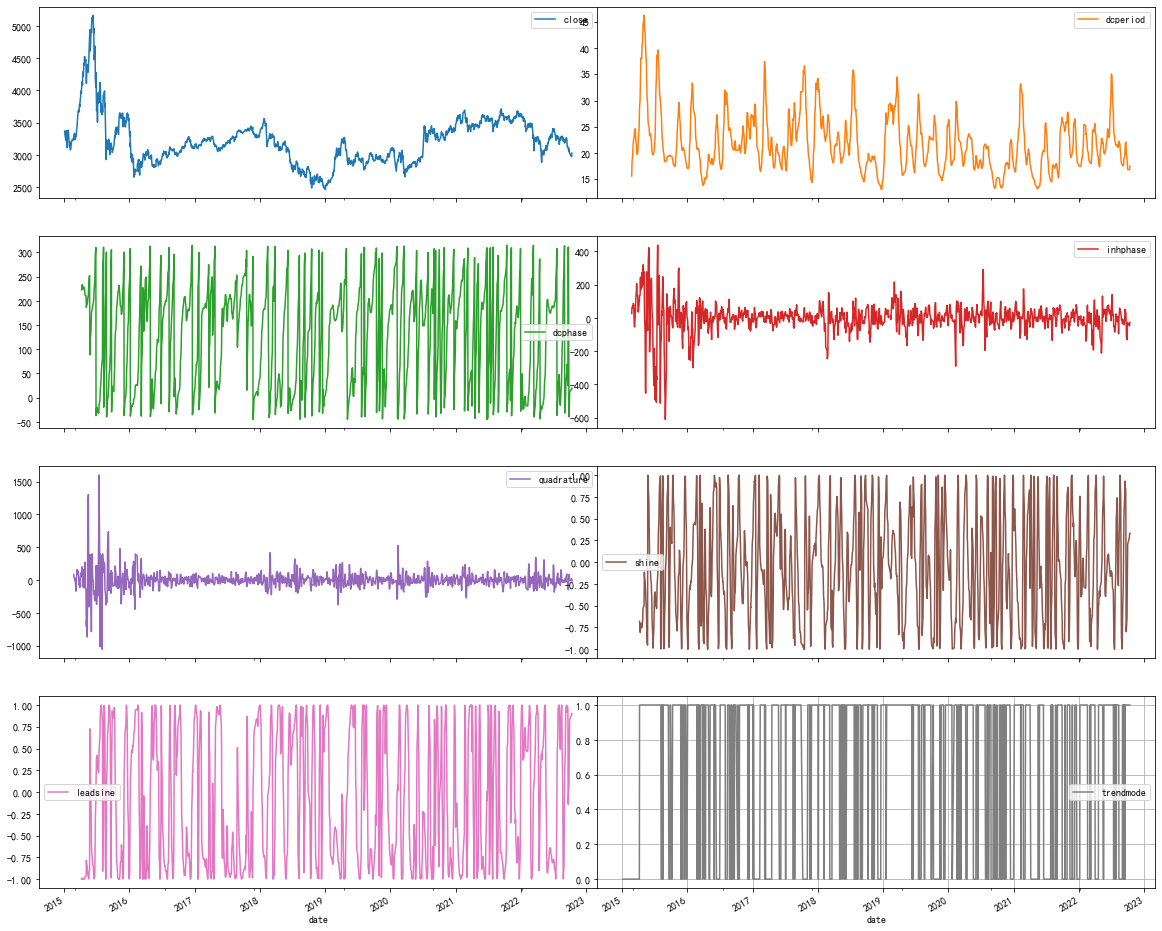

In [13]:
#将上述函数计算得到的结果进行可视化
df[['close','dcperiod','dcphase','inhphase','quadrature','shine','leadsine','trendmode']].plot(figsize=(20,18),
       subplots = True,layout=(4, 2))
plt.grid()
plt.subplots_adjust(wspace=0,hspace=0.2)

----
#### Step 3: 波动率指标函数 Volatility Indicator Functions
- 当前交易日最高价与最低价差值，前一交易日收盘价与当前交易日最高价间的差值，前一交易日收盘价与当前交易日最低价的差值，这三者中的最大值为真实波幅。即真实波动幅度 = max(最大值,昨日收盘价) − min(最小值,昨日收盘价)，平均真实波动幅度等于真实波动幅度的N日指数移动平均数。
- 波动幅度可以显示出交易者的期望和热情。波动幅度的急剧增加表示交易者在当天可能准备持续买进或卖出股票，波动幅度的减少则表示交易者对股市没有太大的兴趣。波动率指标可用于衡量价格的波动情况，辅助判断趋势改变的可能性，市场的交易氛围，也可以利用波动性指标来帮助止损止盈。
![](https://pic4.zhimg.com/80/v2-3f0e632b5c790a35e73b12fe46e53033_720w.webp)


In [14]:
df=get_data('sh')[['open','close','high','low']]
df['atr']=ta.ATR(df.high, df.low, df.close, timeperiod=14)
df['natr']=ta.NATR(df.high, df.low, df.close, timeperiod=14)
df['trange']=ta.TRANGE(df.high, df.low, df.close)
df.tail()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,close,high,low,atr,natr,trange
date,,,,,,,
2022-09-29,3067.47,3041.20,3076.76,3026.08,41.929329,1.378710,50.68
2022-09-30,3042.17,3024.39,3054.61,3021.93,41.268663,1.364528,32.68
2022-10-10,3026.94,2974.15,3029.45,2968.28,42.690187,1.435374,61.17
2022-10-11,2978.06,2979.79,2986.91,2953.50,42.027317,1.410412,33.41
2022-10-12,2976.72,3025.51,3025.51,2934.09,45.555365,1.505709,91.42


c:\Users\sansa\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



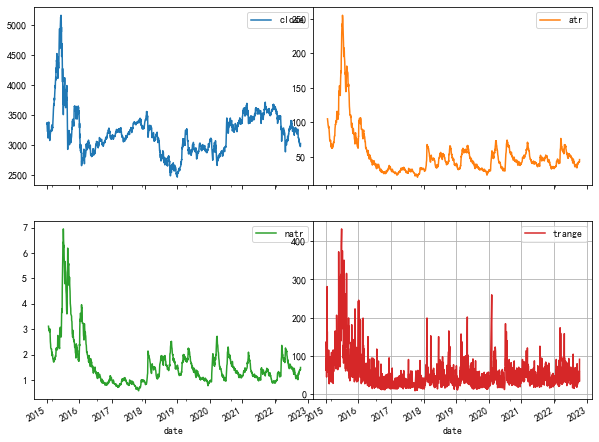

In [16]:
df[['close','atr','natr','trange']].plot(figsize=(10,8),
       subplots = True,layout=(2, 2))
plt.grid()
plt.subplots_adjust(wspace=0,hspace=0.2)

#### Step 4: 数学运算 Math Operator Functions 
- TA-Lib提供了向量（数组）的加减乘除、在某个周期内求和、最大最小值及其索引等计算函数。
- 注意与Numpy和Pandas数学运算函数的联系与区别，TA-Lib的向量计算功能类似于pandas的moving window（移动窗口），得到的是一个新的序列（不是某个值）。
![](https://pic3.zhimg.com/80/v2-27878ed9d89d12c9f28446bcf50d3932_720w.webp)

In [18]:
df=get_data('sh')[['open','close','high','low']]
df['add']=ta.ADD(df.high,df.low) #最高价与最低价之和
df['sub']=ta.SUB(df.high,df.low) #最高价与最低价之差
df['mult']=ta.MULT(df.high,df.low) #最高价与最低价之乘积
df['div']=ta.DIV(df.high,df.low) #最高价与最低价之除
df['sum']=ta.SUM(df.close,timeperiod=30) #收盘价30日的移动平均求和
df['min'], df['max'] = ta.MINMAX(df.close, timeperiod=30) #收盘价的每30日内的最大最小值
df['minidx'], df['maxidx'] = ta.MINMAXINDEX(df.close, timeperiod=30) #收盘价的每30日内的最大最小值对应的索引值（第N行）
df.tail()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,close,high,low,add,sub,mult,div,sum,min,max,minidx,maxidx
date,,,,,,,,,,,,,
2022-09-29,3067.47,3041.20,3076.76,3026.08,6102.84,50.68,9.310522e+06,1.016748,95627.63,3041.20,3277.79,1885,1858
2022-09-30,3042.17,3024.39,3054.61,3021.93,6076.54,32.68,9.230818e+06,1.010814,95374.48,3024.39,3277.79,1886,1858
2022-10-10,3026.94,2974.15,3029.45,2968.28,5997.73,61.17,8.992256e+06,1.020608,95090.55,2974.15,3277.79,1887,1858
2022-10-11,2978.06,2979.79,2986.91,2953.50,5940.41,33.41,8.821839e+06,1.011312,94792.55,2974.15,3276.22,1887,1859
2022-10-12,2976.72,3025.51,3025.51,2934.09,5959.60,91.42,8.877119e+06,1.031158,94541.84,2974.15,3263.80,1887,1873


c:\Users\sansa\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



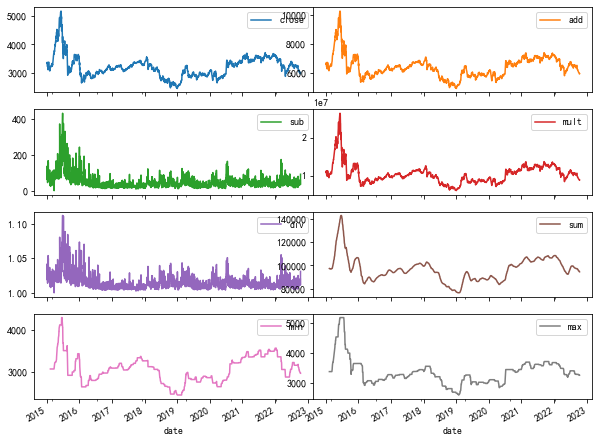

In [20]:
#将上述函数计算得到的结果进行可视化
df[['close','add','sub','mult','div','sum','min','max']].plot(figsize=(10,8),
       subplots = True,
       layout=(4, 2))
plt.subplots_adjust(wspace=0,hspace=0.2)

----
#### Step 5: 统计学函数 statistic functions 
- TA-Lib提供了常用的基础统计学函数，基于时间序列移动窗口进行计算。
- 注意TA-Lib的beta，示例中是求某只股票的最高价与最低价序列的移动beta值，默认时间周期为5日，而资本资产定价中一般是分析某只股票相对于市场（大盘指数）的波动情况。
![](https://pic1.zhimg.com/80/v2-b88c0ef031cd2eb39d772b113f7d06d4_720w.webp)



本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


<AxesSubplot:xlabel='date'>

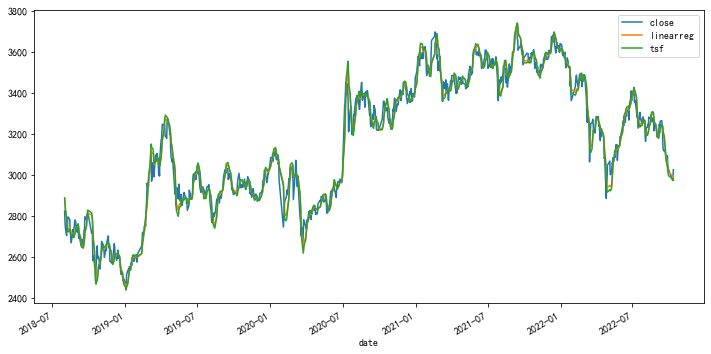

In [23]:
df=get_data('sh')[['open','close','high','low']]
#收盘价对时间t的线性回归预测值
df['linearreg']=ta.LINEARREG(df.close, timeperiod=14)
#时间序列预测值
df['tsf']=ta.TSF(df.close, timeperiod=14)
#画图
df.loc['2018-08-01':,['close','linearreg','tsf']].plot(figsize=(12,6))

c:\Users\sansa\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.

c:\Users\sansa\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



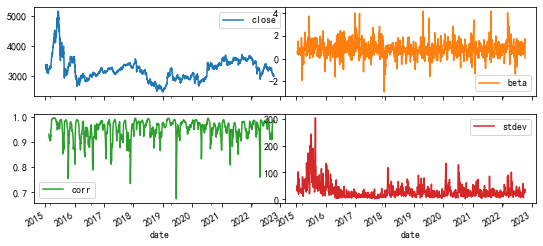

In [25]:
df['beta']=ta.BETA(df.high,df.low,timeperiod=5)
df['corr']=ta.CORREL(df.high,df.low,timeperiod=30)
df['stdev']=ta.STDDEV(df.close,timeperiod=5,nbdev=1)
#将上述函数计算得到的结果进行可视化
df[['close','beta','corr','stdev']].plot(figsize=(9,4),
       subplots = True,layout=(2, 2))
plt.subplots_adjust(wspace=0,hspace=0.2)

----
#### Step 6: 数学转换函数 Math transfor functions 
- TA-Lib提供了三角函数（正余弦、正余切、双曲）、取整、对数、平方根等数学转换函数，均是基于时间序列的向量变换
![](https://pic4.zhimg.com/80/v2-6070d6cea0b07d30869a6c4cf0f6ce0f_720w.webp)

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


c:\Users\sansa\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



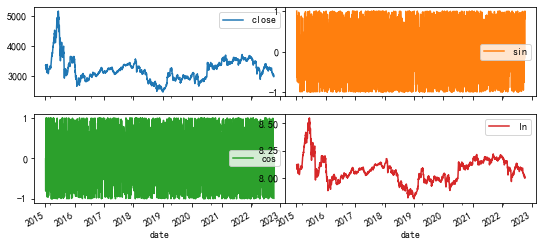

In [27]:
df=get_data('sh')[['open','close','high','low']]
df['sin']=ta.SIN(df.close)
df['cos']=ta.COS(df.close)
df['ln']=ta.LN(df.close)
#将上述函数计算得到的结果进行可视化
df[['close','sin','cos','ln']].plot(figsize=(9,4),
       subplots = True,layout=(2, 2))
plt.subplots_adjust(wspace=0,hspace=0.2)
